In [1]:
ls

 Attention_imdb.ipynb       cnn_kd_twitter.ipynb
 Attention_tiwtter.ipynb    cnn_twitter.ipynb
'bert_gru_tiwtter .ipynb'   kd_atten_lstm_imdb.ipynb
 bert_imdb.ipynb            kd_lstm_imdb.ipynb
 bert_linear_imdb.ipynb     lstm_baseline.ipynb
 bert_twitter.ipynb         lstm_basline_Twitter.ipynb
 cnn_imdb.ipynb             lstm_kd_atten_twitter.ipynb
 cnn_kd.ipynb               lstm_kd_twitter.ipynb


In [2]:
cd ..

/project/6006178/dongxx


In [3]:
ls

16_mercer_kd.out   kd_lstm.out         slurm-22060427.out  t_cnn.sh
16_pa_kd.out       LSTMbaseline/       slurm-22060432.out  Tiwtter_atten_kd.out
32_mercer_kd.out   Model_parameter/    slurm-22205575.out  Tiwtter_atten.out
32_pa_kd.out       new_bert.pt         slurm-22205595.out  Tiwtter_cnn_kd.out
atten.out          r_bert_gru.sh       slurm-22290702.out  Tiwtter_cnn.out
bert_ft.sh         r_bert_t.sh         slurm-22290962.out  Tiwtter_gru_bert.out
data/              result/             slurm-22291353.out  Tiwtter_linear.out
data140/           r_lstm_a.sh         slurm-22407206.out  Tiwtter_lstm_kd.out
ENV/               r_lstm.sh           slurm-28010453.out  Tiwtter_lstm.out
ft_kd_atten.out    slurm-21749546.out  slurm-28010456.out  t_lstm_kd.sh
glove.6B.100d.txt  slurm-21990450.out  t_atten_lstm_kd.sh  t_lstm.sh
IMDB_data/         slurm-21991185.out  t_att_lstm.sh       twitter_baseline/
IMDB_result/       slurm-21992242.out  t_bert_t.sh         twitter_parameter/
kd_atten_lstm

In [4]:
ls

16_mercer_kd.out   kd_lstm.out         slurm-22060427.out  t_cnn.sh
16_pa_kd.out       LSTMbaseline/       slurm-22060432.out  Tiwtter_atten_kd.out
32_mercer_kd.out   Model_parameter/    slurm-22205575.out  Tiwtter_atten.out
32_pa_kd.out       new_bert.pt         slurm-22205595.out  Tiwtter_cnn_kd.out
atten.out          r_bert_gru.sh       slurm-22290702.out  Tiwtter_cnn.out
bert_ft.sh         r_bert_t.sh         slurm-22290962.out  Tiwtter_gru_bert.out
data/              result/             slurm-22291353.out  Tiwtter_linear.out
data140/           r_lstm_a.sh         slurm-22407206.out  Tiwtter_lstm_kd.out
ENV/               r_lstm.sh           slurm-28010453.out  Tiwtter_lstm.out
ft_kd_atten.out    slurm-21749546.out  slurm-28010456.out  t_lstm_kd.sh
glove.6B.100d.txt  slurm-21990450.out  t_atten_lstm_kd.sh  t_lstm.sh
IMDB_data/         slurm-21991185.out  t_att_lstm.sh       twitter_baseline/
IMDB_result/       slurm-21992242.out  t_bert_t.sh         twitter_parameter/
kd_atten_lstm

In [5]:
cd LSTMbaseline/

/project/6006178/dongxx/LSTMbaseline


In [6]:
from models import CNN_Baseline,LSTM_atten
from run_atten import validate, prepare_dateset,generate_batch,weight_matrix,epoch_time
import torch

import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchtext.vocab import GloVe,Vocab,Vectors
from tqdm import tqdm
from utils import IMDB_indexing, pad_sequenc,pad_sequencing
import torchtext.vocab
import csv
import pandas as pd
import argparse
import logging
import os
import pickle
import sys
import config
config.seed_torch()
from collections import Counter
import time
import copy

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [8]:
test = '/home/dongxx/projects/def-parimala/dongxx/data/test.csv'
valid = '/home/dongxx/projects/def-parimala/dongxx/data/valid.csv'
train ='/home/dongxx/projects/def-parimala/dongxx/data/train.csv'

In [9]:
glove = torchtext.vocab.GloVe(name='6B', dim=100,)
    # print(glove.get_vecs_by_tokens(['picture']))
counter2 = Counter({'<unk>': 400000, '<pad>': 400001,'the':1})
counter1 =  copy.deepcopy(glove.stoi)

counter1.update(counter2)
    # print(counter1)

vocab = Vocab(counter1)

In [10]:
train_dataset, validation_dataset,test_dataset,labellist = prepare_dateset(train, valid,test,vocab)
testing = DataLoader(test_dataset, collate_fn= generate_batch, batch_size=32, shuffle=False)
LSTM_model =LSTM_atten(vocab_size = 400002,hidden_dim =256 , n_layers = 2, dropout = 0.25, number_class = 2, bidirectional = True, embedding_dim =100)
LSTM_model.embedding_layer.weight.data.copy_(weight_matrix(vocab,glove)).to(device)
LSTM_model.embedding_layer.weight.data[1] = torch.zeros(100)
LSTM_model.embedding_layer.weight.data[0] = torch.zeros(100)
LSTM_model.to(device)
criterion = nn.CrossEntropyLoss()
criterion.to(device)
LSTM_model.load_state_dict(torch.load('/home/dongxx/projects/def-parimala/dongxx/Model_parameter/kd_atten.pt'))

Start loading training data
Finish loading training data
Start loading validation data
Finish loading validation data
Start loading testing data
Finish loading testing data
prepare training and test sets


20000lines [00:07, 2628.44lines/s]
5000lines [00:02, 2435.22lines/s]
25000lines [00:11, 2228.61lines/s]


building vocab


<All keys matched successfully>

In [11]:
start_time = time.time()
test_loss, test_acc,flat_list = validate(testing,LSTM_model,criterion,device)
end_time = time.time()
epoch_mins, epoch_secs = epoch_time(start_time, end_time)
print(f' | Epoch Time: {epoch_mins}m {epoch_secs}s')
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc * 100:.2f}%')



 | Epoch Time: 3m 12s
Test Loss: 0.279 | Test Acc: 89.67%


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import itertools

In [13]:
pred_list =[item.cpu().numpy() for sublist in flat_list for item in sublist]

In [14]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

[[0.89664 0.10336]
 [0.10288 0.89712]]


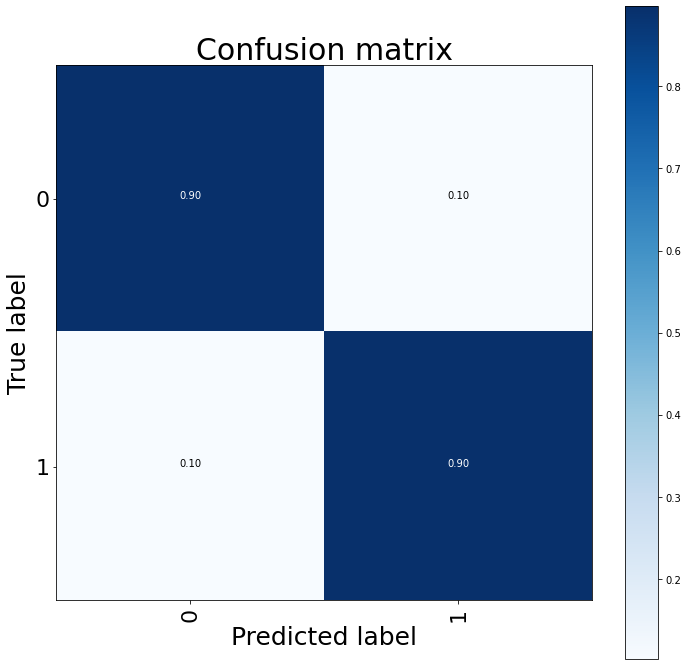

In [15]:
cnf_matrix = confusion_matrix(labellist, pred_list)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=[0,1], title="Confusion matrix")
plt.show()

In [16]:
print(classification_report(labellist, pred_list,digits =4))

              precision    recall  f1-score   support

           0     0.8971    0.8966    0.8969     12500
           1     0.8967    0.8971    0.8969     12500

    accuracy                         0.8969     25000
   macro avg     0.8969    0.8969    0.8969     25000
weighted avg     0.8969    0.8969    0.8969     25000

